<H1>Módulo 3: Descomposición de Series Temporales</H1>

- **Conceptos clave**:
  - Descomposición aditiva y multiplicativa de series temporales.
  - Identificación de tendencia, estacionalidad y residuos.
  - Aplicación de métodos de descomposición como STL (Seasonal and Trend decomposition using Loess).
    
- **Proyecto**: Descomponer una serie temporal.
  
  - Utilizar un conjunto de datos financieros o meteorológicos para descomponer la serie en sus componentes y analizar cómo cada uno contribuye al comportamiento general de la serie.

**Instalación de las bibliotecas necesarias**

In [1]:
!pip install pandas statsmodels matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


**Paso 1: Importar las bibliotecas**

Vamos a comenzar importando las bibliotecas necesarias para el análisis de series temporales.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL

**Paso 2: Cargar y visualizar el conjunto de datos**
    
Utilizaremos un conjunto de datos meteorológicos con temperaturas mínimas diarias como ejemplo de serie temporal. Los datos serán cargados desde un archivo CSV disponible en línea. Luego graficaremos la serie para ver su comportamiento inicial.

Primeras filas del conjunto de datos:
            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


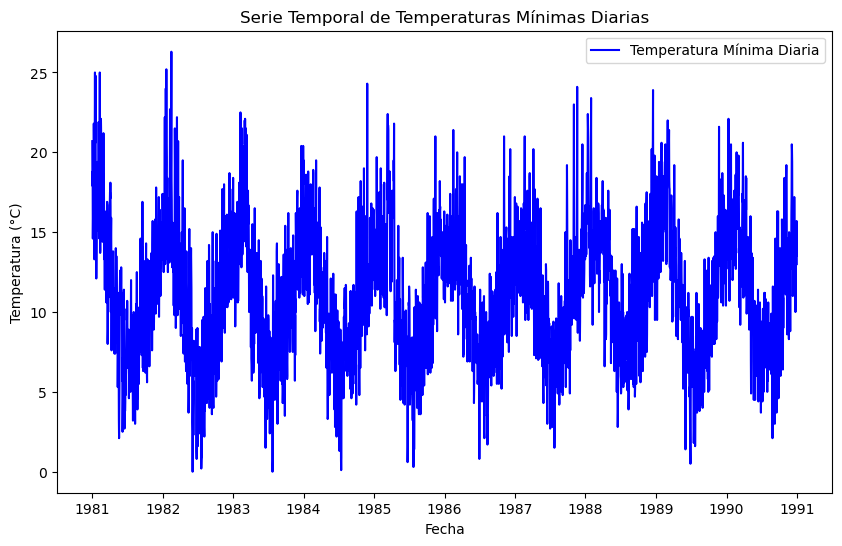

In [3]:
# Cargar el conjunto de datos meteorológicos
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Mostrar las primeras filas del DataFrame
print("Primeras filas del conjunto de datos:")
print(df.head())

# Graficar la serie temporal
plt.figure(figsize=(10,6))
plt.plot(df['Temp'], label='Temperatura Mínima Diaria', color='blue')
plt.title('Serie Temporal de Temperaturas Mínimas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()


**Paso 3: Descomposición de la serie temporal**

El siguiente paso es aplicar el método de descomposición STL para separar la serie en tres componentes: tendencia, estacionalidad y residuos.

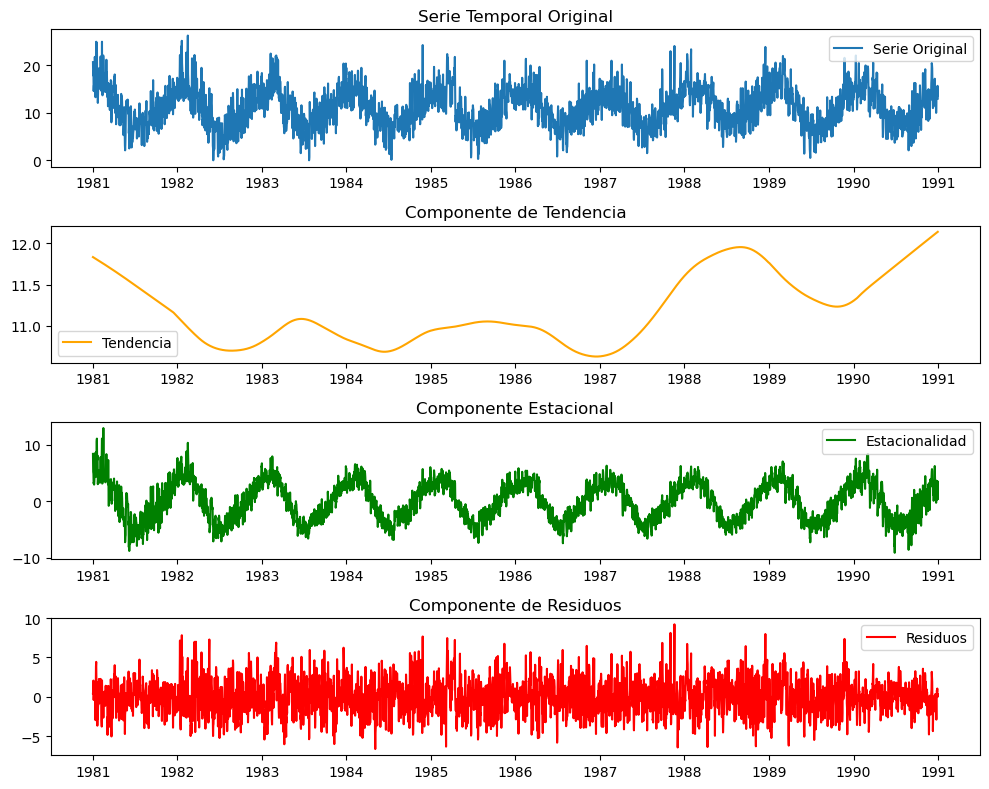

In [5]:
# Definir el período para la serie temporal (1 año = 365 días)
periodo = 365

# Descomponer la serie usando STL (Seasonal-Trend decomposition using Loess)
stl = STL(df['Temp'], period=periodo)  # Establecemos el período como 365 días para capturar estacionalidad anual
result = stl.fit()

# Extraer los componentes de la descomposición
tendencia = result.trend
estacionalidad = result.seasonal
residuos = result.resid

# Graficar los componentes de la descomposición
plt.figure(figsize=(10,8))

plt.subplot(4, 1, 1)
plt.plot(df['Temp'], label='Serie Original')
plt.title('Serie Temporal Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(tendencia, label='Tendencia', color='orange')
plt.title('Componente de Tendencia')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(estacionalidad, label='Estacionalidad', color='green')
plt.title('Componente Estacional')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residuos, label='Residuos', color='red')
plt.title('Componente de Residuos')
plt.legend()

plt.tight_layout()
plt.show()


**Paso 4: Análisis de los componentes**

Ahora que hemos descompuesto la serie, podemos realizar un análisis más profundo de cada componente. Esto es crucial para entender el comportamiento de la serie y para identificar patrones que pueden ser útiles para la predicción.

**Tendencia:**

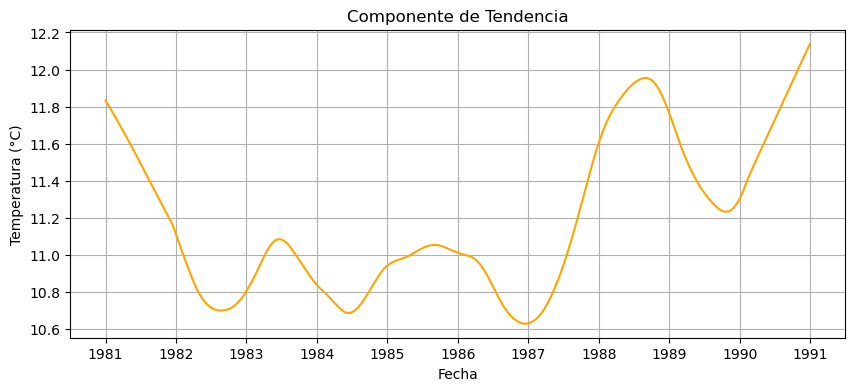

Análisis de la tendencia:
count    3650.000000
mean       11.185152
std         0.412766
min        10.627426
25%        10.838406
50%        11.044470
75%        11.523774
max        12.139252
Name: trend, dtype: float64


In [6]:
# Graficar solo la tendencia
plt.figure(figsize=(10,4))
plt.plot(tendencia, color='orange')
plt.title('Componente de Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

# Análisis de tendencia
print("Análisis de la tendencia:")
print(tendencia.describe())

**Estacionalidad:**

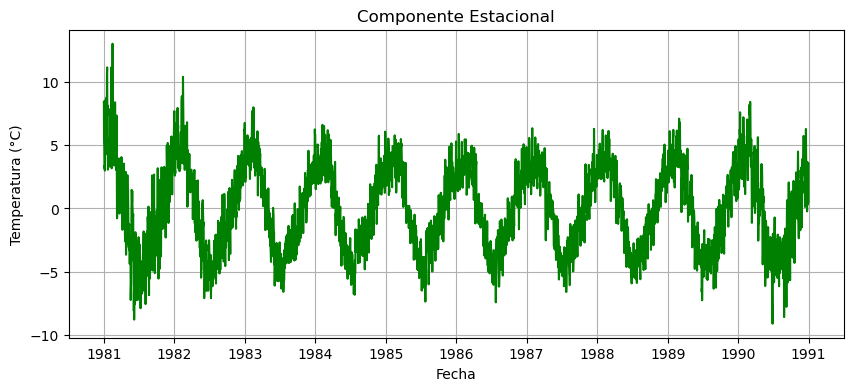

Análisis de la estacionalidad:
count    3650.000000
mean        0.002163
std         3.359884
min        -9.102206
25%        -2.803032
50%        -0.103225
75%         2.772693
max        12.999587
Name: season, dtype: float64


In [7]:
# Graficar solo la estacionalidad
plt.figure(figsize=(10,4))
plt.plot(estacionalidad, color='green')
plt.title('Componente Estacional')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

# Análisis de estacionalidad
print("Análisis de la estacionalidad:")
print(estacionalidad.describe())

**Residuos:**

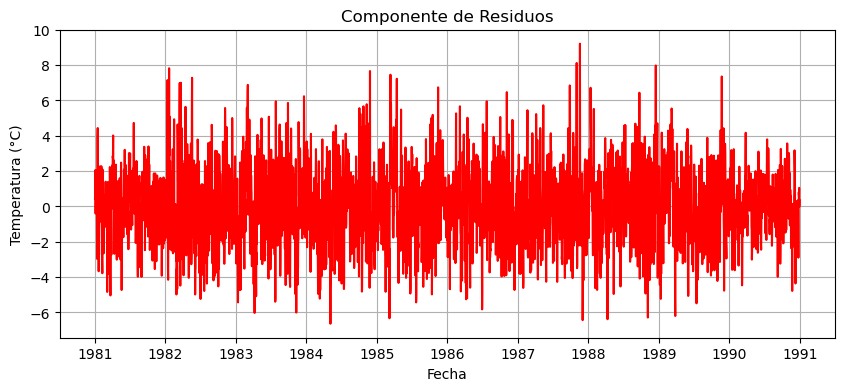

Análisis de los residuos:
count    3650.000000
mean       -0.009562
std         2.156470
min        -6.640644
25%        -1.405477
50%        -0.022182
75%         1.334316
max         9.211253
Name: resid, dtype: float64


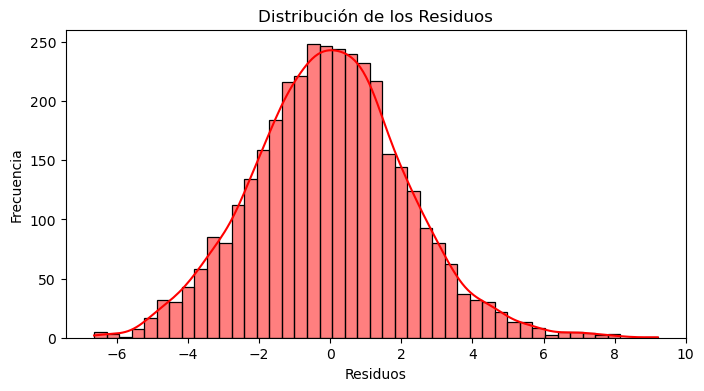

In [8]:
# Graficar solo los residuos
plt.figure(figsize=(10,4))
plt.plot(residuos, color='red')
plt.title('Componente de Residuos')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

# Análisis de residuos
print("Análisis de los residuos:")
print(residuos.describe())

# Graficar histograma de los residuos para ver su distribución
plt.figure(figsize=(8,4))
sns.histplot(residuos, kde=True, color='red')
plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()
